In [1]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
# Handle Missing Value
titanic.isna().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [10]:
titanic['age'].mean()

29.881134512428297

In [11]:
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].mean())
titanic['embarked'] = titanic['embarked'].fillna('unknown')

In [12]:
titanic.isna().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [13]:
X = pd.get_dummies(titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']])
y = titanic['survived']

In [14]:
X.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_unknown
0,1,29.0000,0,0,211.3375,1,0,0,0,1,0
1,1,0.9167,1,2,151.5500,0,1,0,0,1,0
2,1,2.0000,1,2,151.5500,1,0,0,0,1,0
3,1,30.0000,1,2,151.5500,0,1,0,0,1,0
4,1,25.0000,1,2,151.5500,1,0,0,0,1,0


In [ ]:
# Try fitting a Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [19]:
model1 = DecisionTreeClassifier(max_depth=5)
cross_val_score(model1, X, y, cv=5, scoring='accuracy')

array([0.50763359, 0.82061069, 0.71374046, 0.70610687, 0.63601533])

In [22]:
?tree.plot_tree

[Text(816.8798076923077, 996.6, 'sex_male <= 0.5\nentropy = 0.472\nsamples = 1309\nvalue = [809, 500]'),
 Text(410.4519230769231, 815.4000000000001, 'pclass <= 2.5\nentropy = 0.397\nsamples = 466\nvalue = [127, 339]'),
 Text(177.05769230769232, 634.2, 'fare <= 26.125\nentropy = 0.127\nsamples = 250\nvalue = [17, 233]'),
 Text(96.57692307692308, 453.0, 'age <= 56.0\nentropy = 0.258\nsamples = 79\nvalue = [12, 67]'),
 Text(64.38461538461539, 271.79999999999995, 'fare <= 12.825\nentropy = 0.226\nsamples = 77\nvalue = [10, 67]'),
 Text(32.19230769230769, 90.59999999999991, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(96.57692307692308, 90.59999999999991, 'entropy = 0.26\nsamples = 65\nvalue = [10, 55]'),
 Text(128.76923076923077, 271.79999999999995, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(257.53846153846155, 453.0, 'age <= 2.5\nentropy = 0.057\nsamples = 171\nvalue = [5, 166]'),
 Text(193.15384615384616, 271.79999999999995, 'fare <= 96.565\nentropy = 0.444\nsamples =

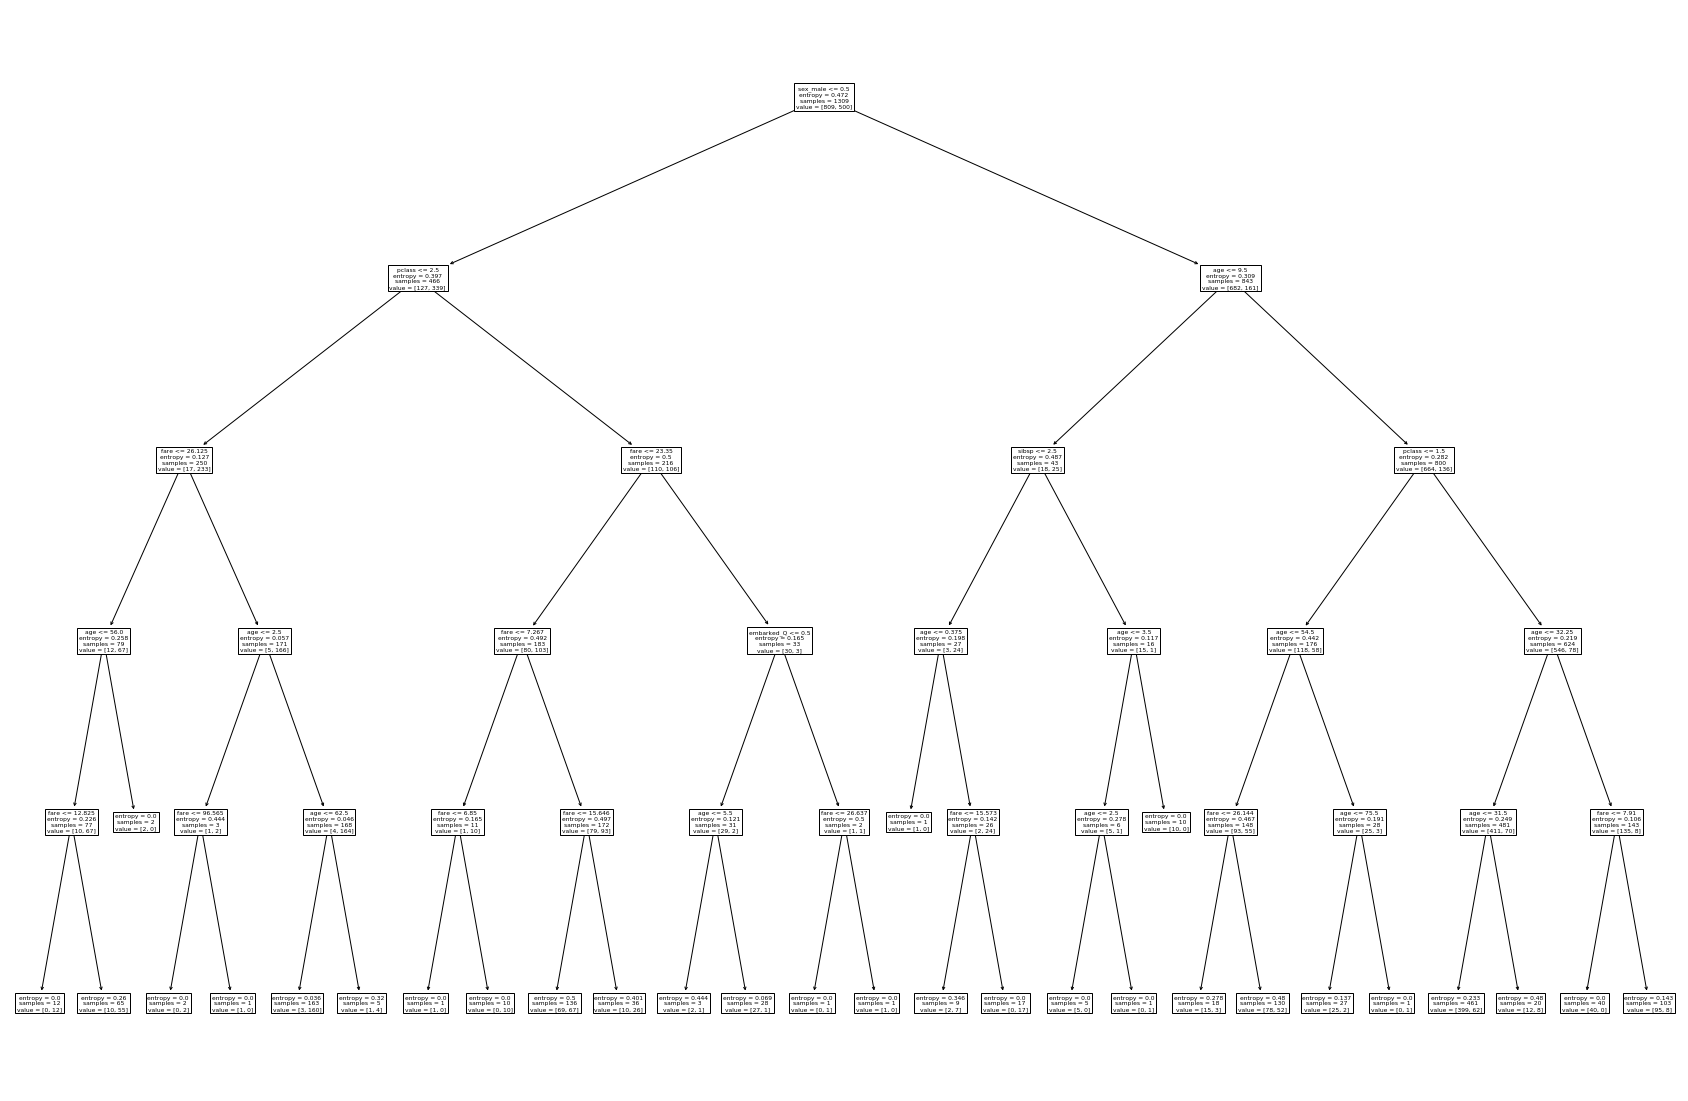

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30, 20))
tree.plot_tree(model1.fit(X,y), feature_names=X.columns) 

In [ ]:
# Can we tune the parameters?

In [24]:
?DecisionTreeClassifier

In [ ]:
# Can Tune Parameters such as:
# max_depth
# min_samples_split
# min_samples_leaf

In [ ]:
# BONUS: Try other classification algorithm?